# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Data Loading

In [2]:
data = pd.read_csv('C:/Users/Martin/Desktop/Codage/Jeux de données/WineQuality/data/winequality-red.csv')

In [3]:
data.shape

(1599, 12)

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Data analysis

In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Correlations

### Finding correlations

<Axes: >

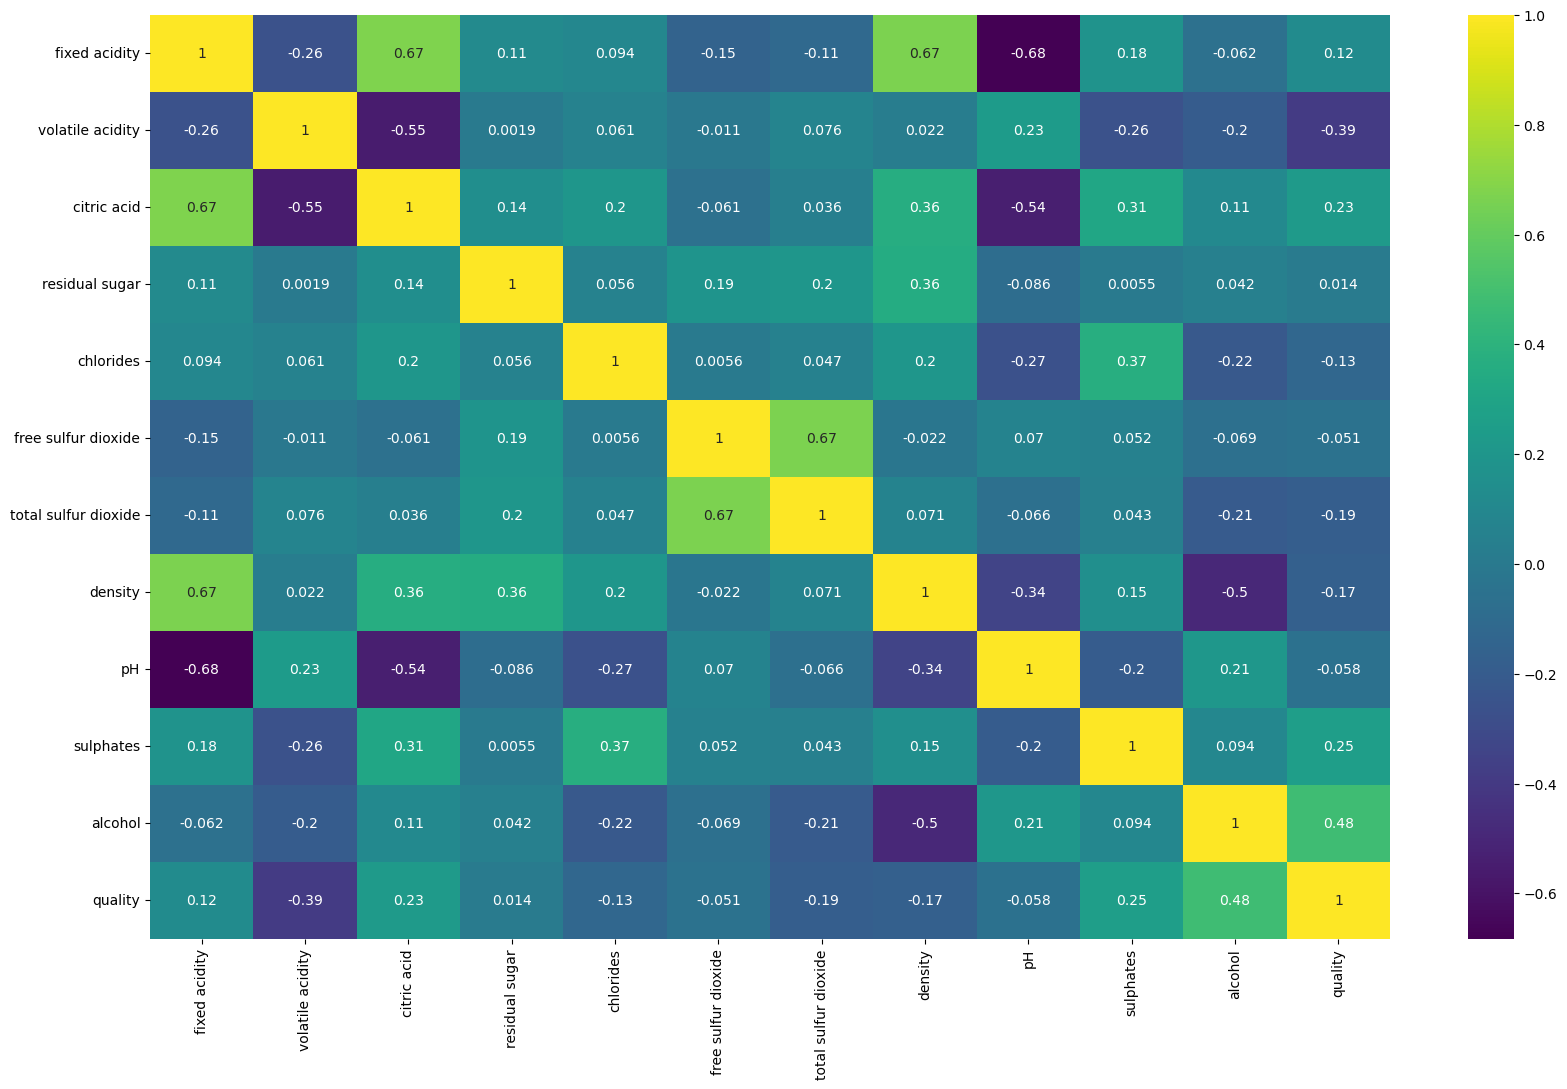

In [8]:
plt.subplots(figsize=(20,12))
sns.heatmap(data.corr(),annot = True,cmap = 'viridis')

In [9]:
corr = data.corr()

for i in range(len(corr)):
    
    a = ((corr.iloc[i]>0.5) & (corr.iloc[i]!=1))
    b = ((corr.iloc[i]<(-0.5))&(corr.iloc[i]!=1))
    axes = a.axes[0]
    
    print('Correlations according to', a.name, ':\n')
    
    print('Positive :')
    if True in a.values:
        for i in range (len(axes)):
            if a[axes[i]]== True:
                print('    - ' + axes[i])
    else:
        print('    - None')
    print('Negative :')
    if True in b.values:
        for i in range (len(axes)):
            if b[axes[i]]== True:
                print('    - ' + axes[i])
    else:
        print('    - None')
        
    print('\n')

Correlations according to fixed acidity :

Positive :
    - citric acid
    - density
Negative :
    - pH


Correlations according to volatile acidity :

Positive :
    - None
Negative :
    - citric acid


Correlations according to citric acid :

Positive :
    - fixed acidity
Negative :
    - volatile acidity
    - pH


Correlations according to residual sugar :

Positive :
    - None
Negative :
    - None


Correlations according to chlorides :

Positive :
    - None
Negative :
    - None


Correlations according to free sulfur dioxide :

Positive :
    - total sulfur dioxide
Negative :
    - None


Correlations according to total sulfur dioxide :

Positive :
    - free sulfur dioxide
Negative :
    - None


Correlations according to density :

Positive :
    - fixed acidity
Negative :
    - None


Correlations according to pH :

Positive :
    - None
Negative :
    - fixed acidity
    - citric acid


Correlations according to sulphates :

Positive :
    - None
Negative :
    - None

### Plotting charts with previous correlations

#### According to fixed acidity

C:\Users\Martin\AppData\Local\Temp\ipykernel_20940\2122662423.py:1: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.relplot(x='fixed acidity', y="citric acid", hue="quality", data=data, height=10, palette=sns.color_palette())


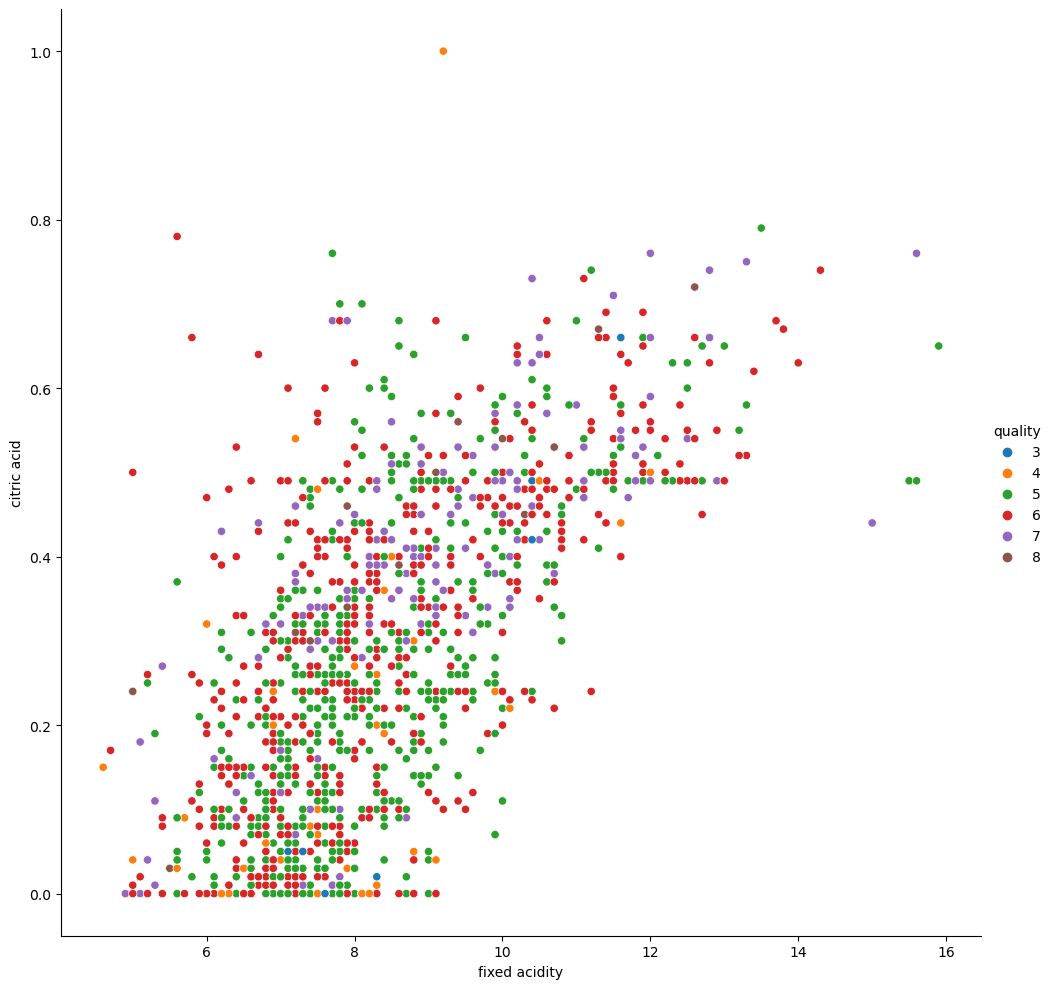

In [22]:
sns.relplot(x='fixed acidity', y="citric acid", hue="quality", data=data, height=10, palette=sns.color_palette())
plt.show()

C:\Users\Martin\AppData\Local\Temp\ipykernel_20940\3184058786.py:1: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.relplot(x='fixed acidity', y="density", hue="quality", data=data, height=20, palette=sns.color_palette())


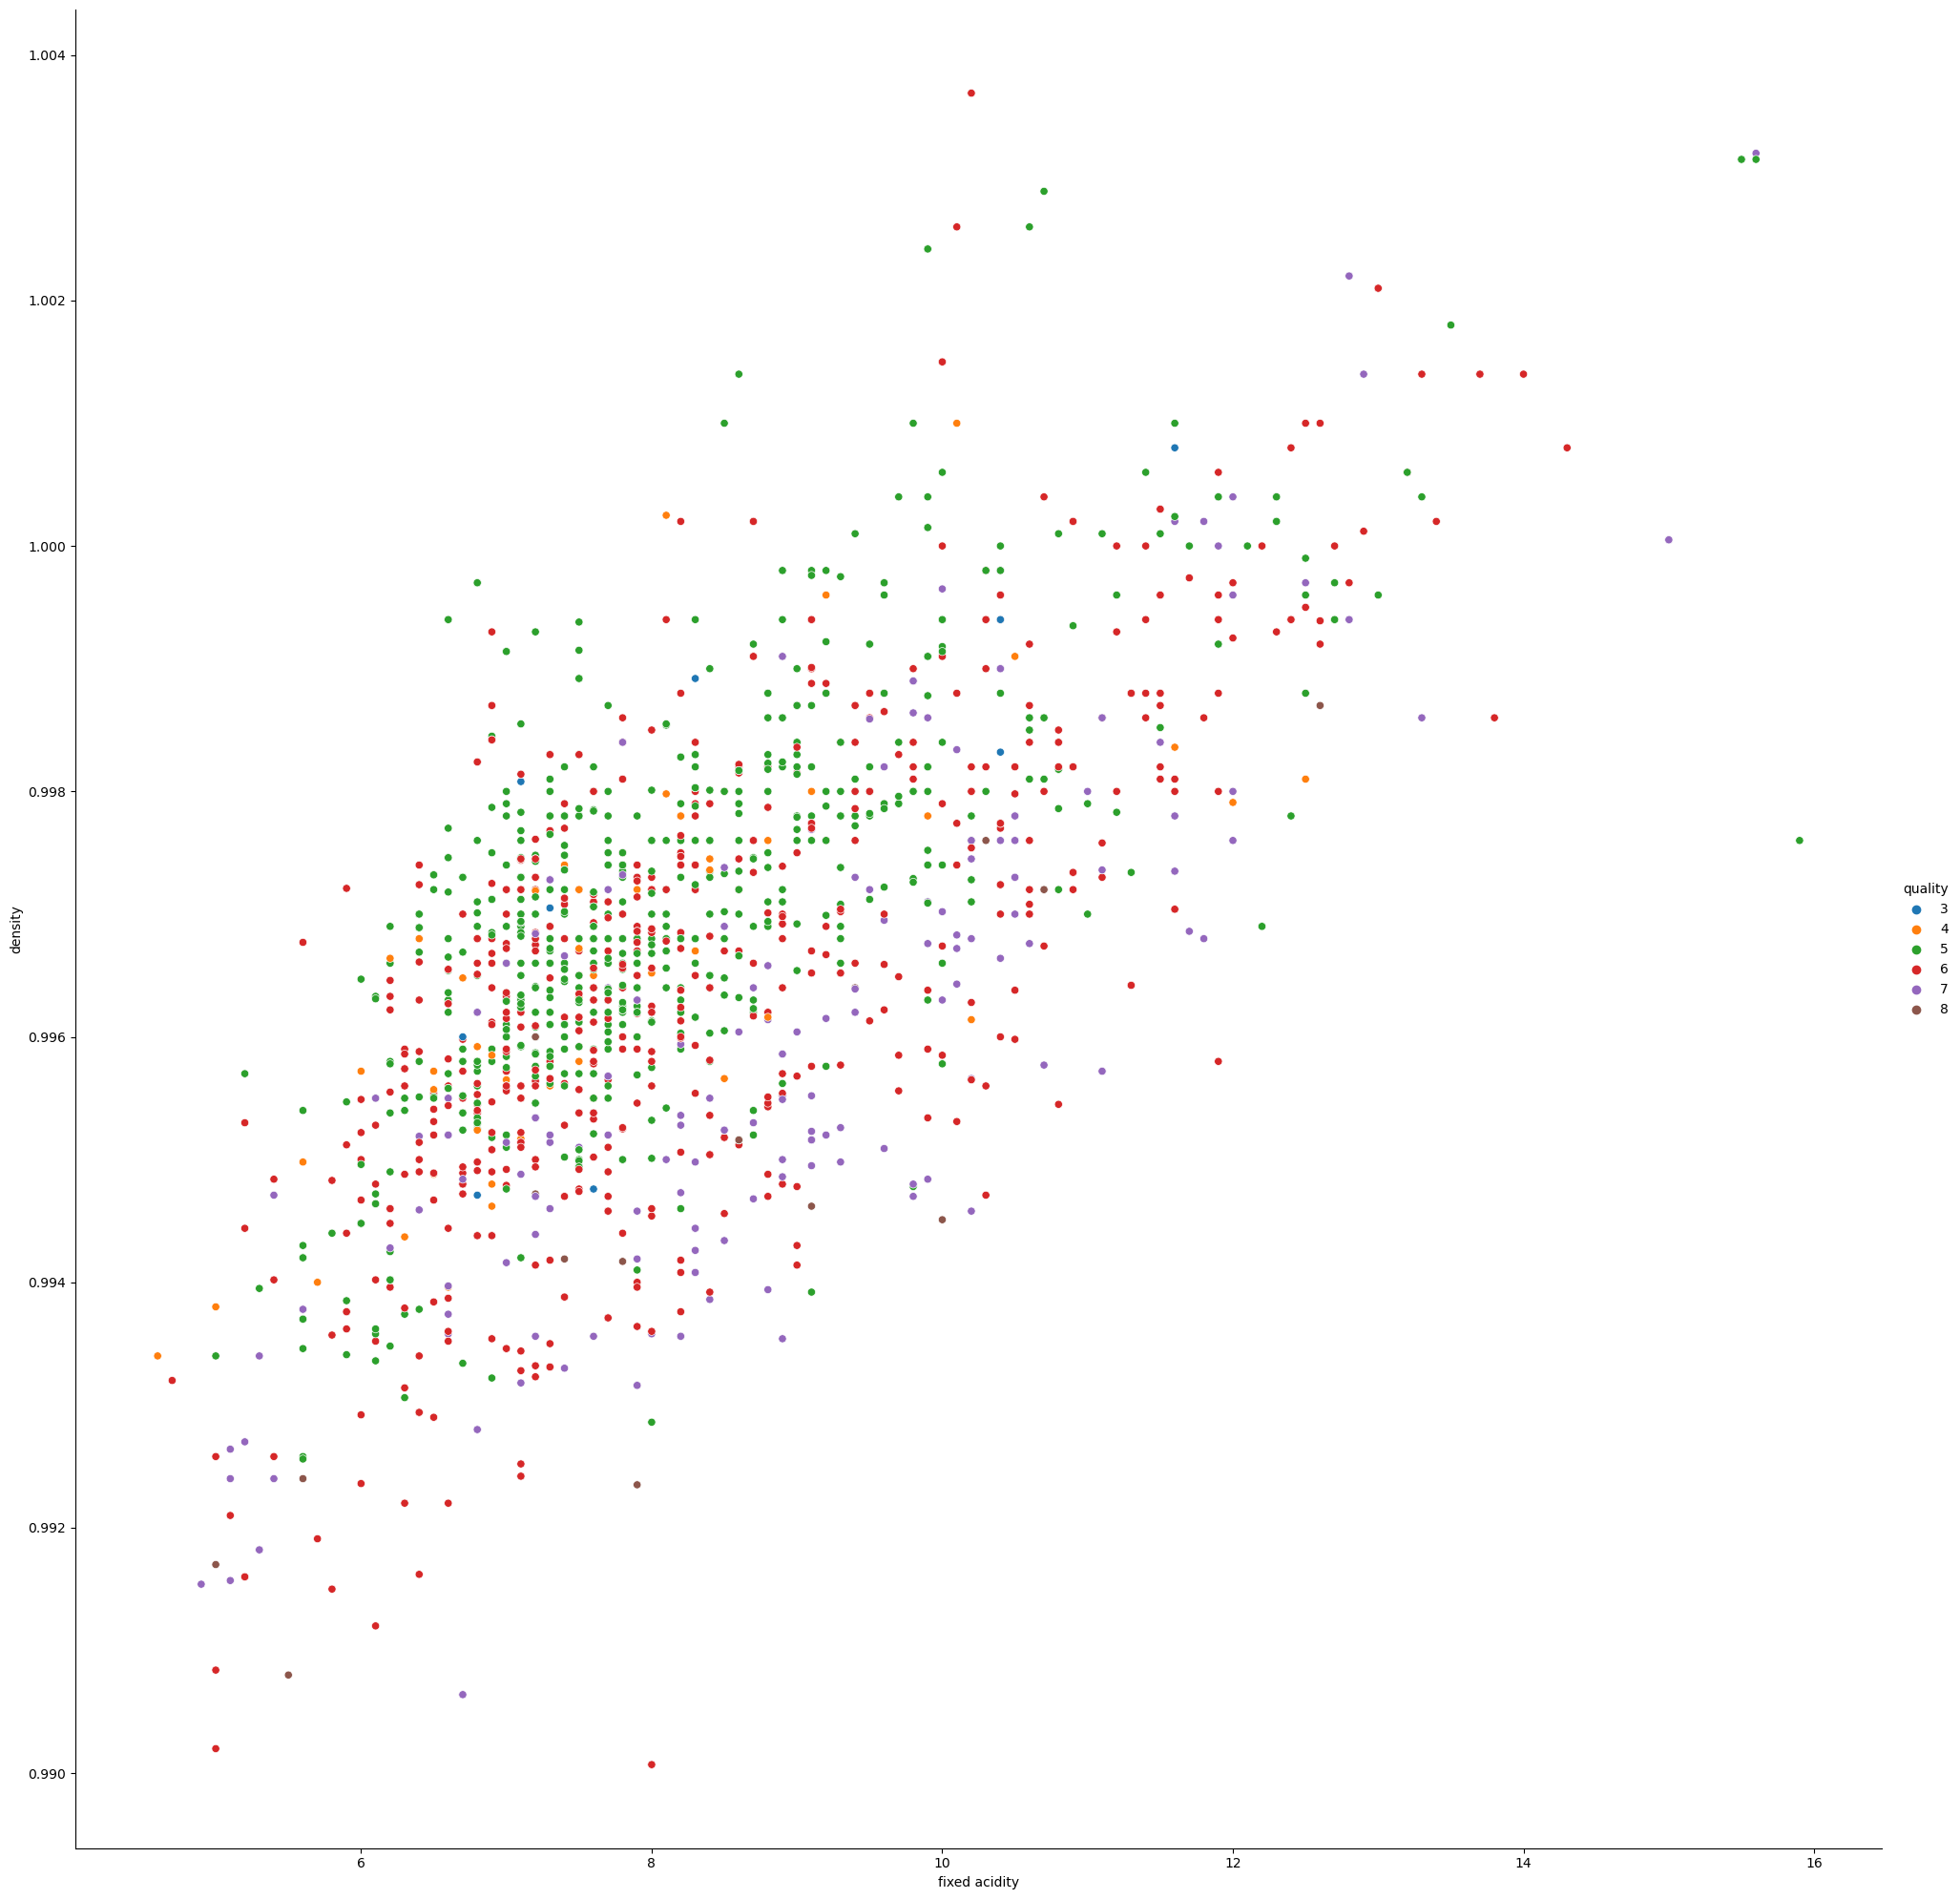

In [25]:
sns.relplot(x='fixed acidity', y="density", hue="quality", data=data, height=20, palette=sns.color_palette())
plt.show()

C:\Users\Martin\AppData\Local\Temp\ipykernel_20940\965036562.py:1: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.relplot(x='fixed acidity', y="pH", hue="quality", data=data, height=15, palette=sns.color_palette())


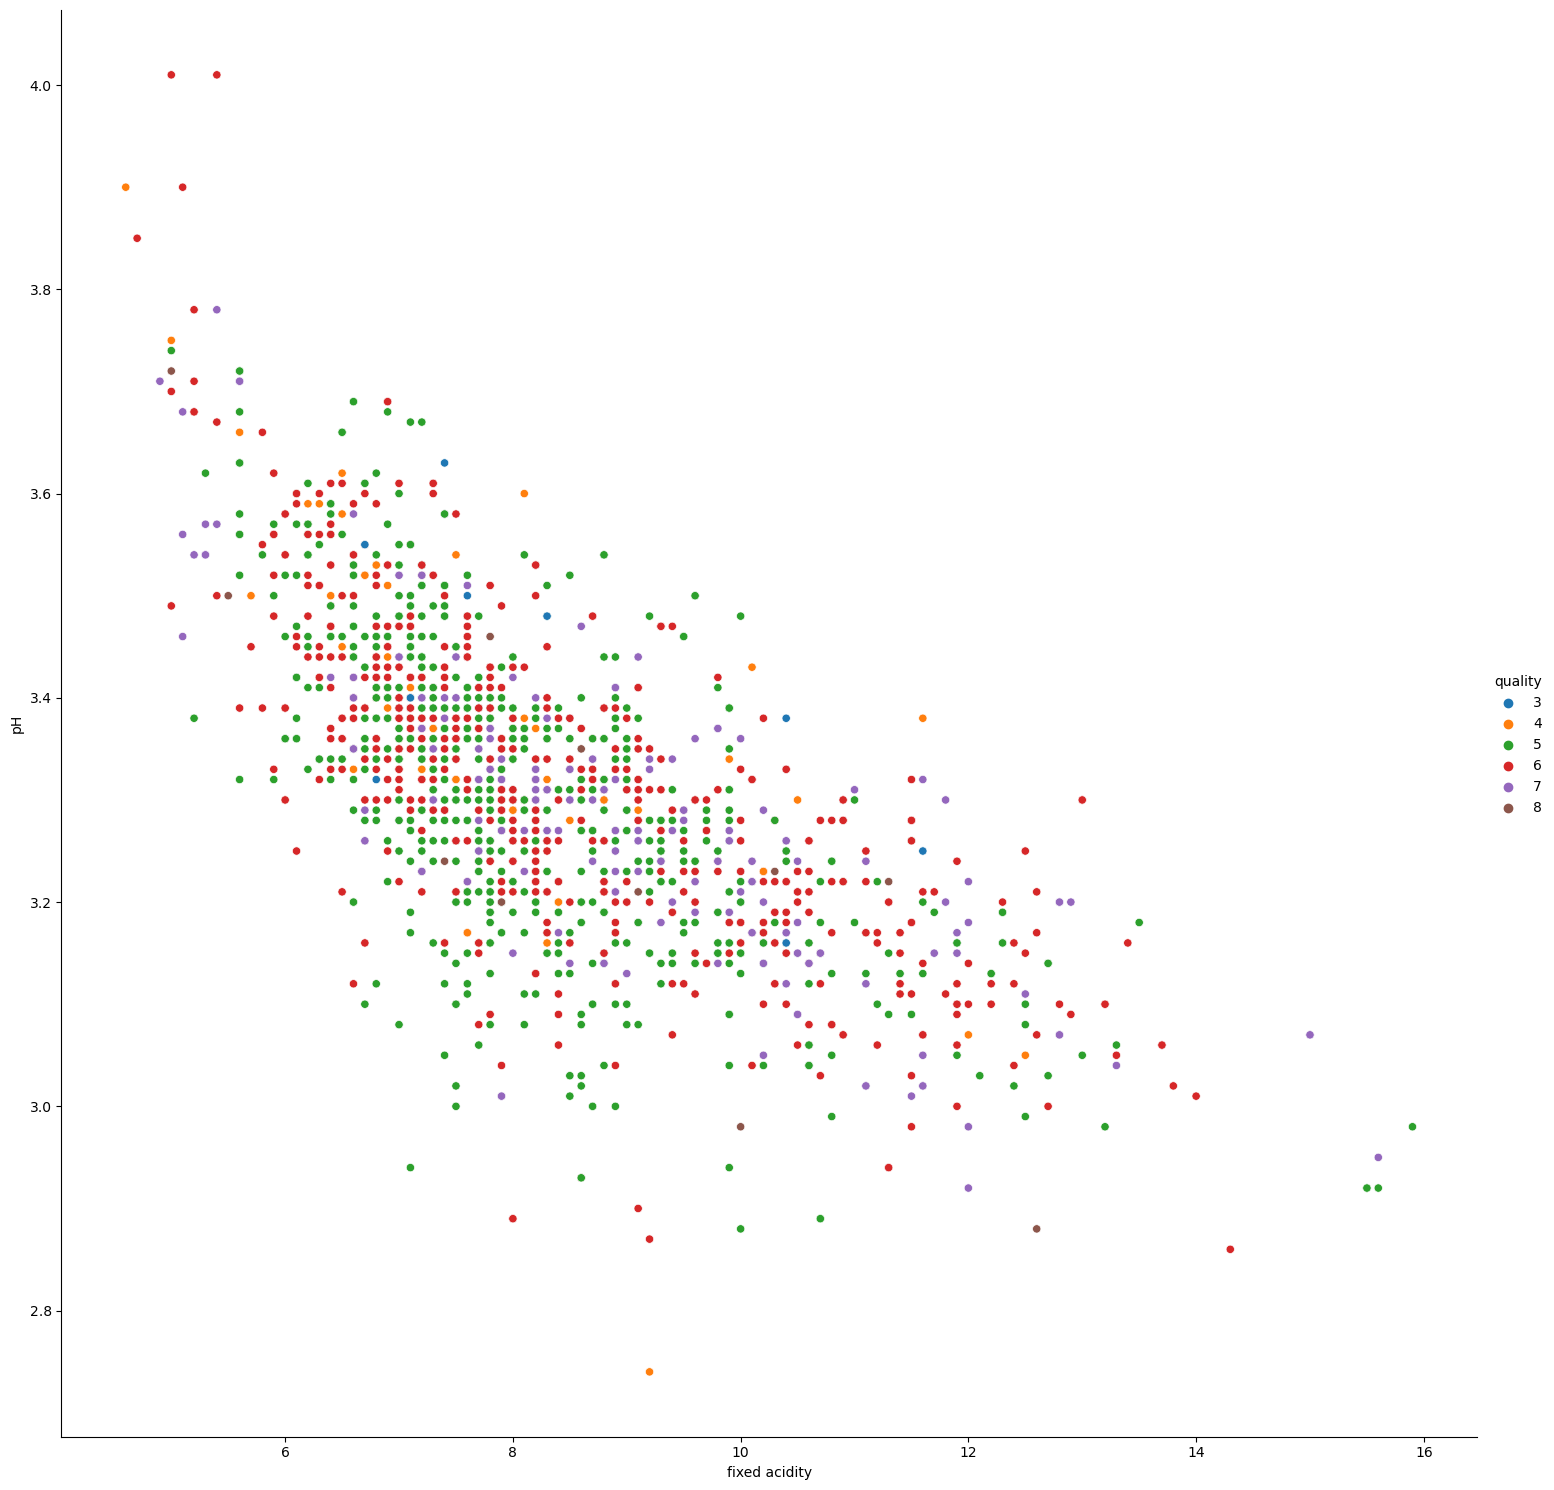

In [27]:
sns.relplot(x='fixed acidity', y="pH", hue="quality", data=data, height=15, palette=sns.color_palette())
plt.show()

#### According to volatile acidity

C:\Users\Martin\AppData\Local\Temp\ipykernel_20940\3750078972.py:1: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.relplot(x='volatile acidity', y="citric acid", hue="quality", data=data, height=20, palette=sns.color_palette())


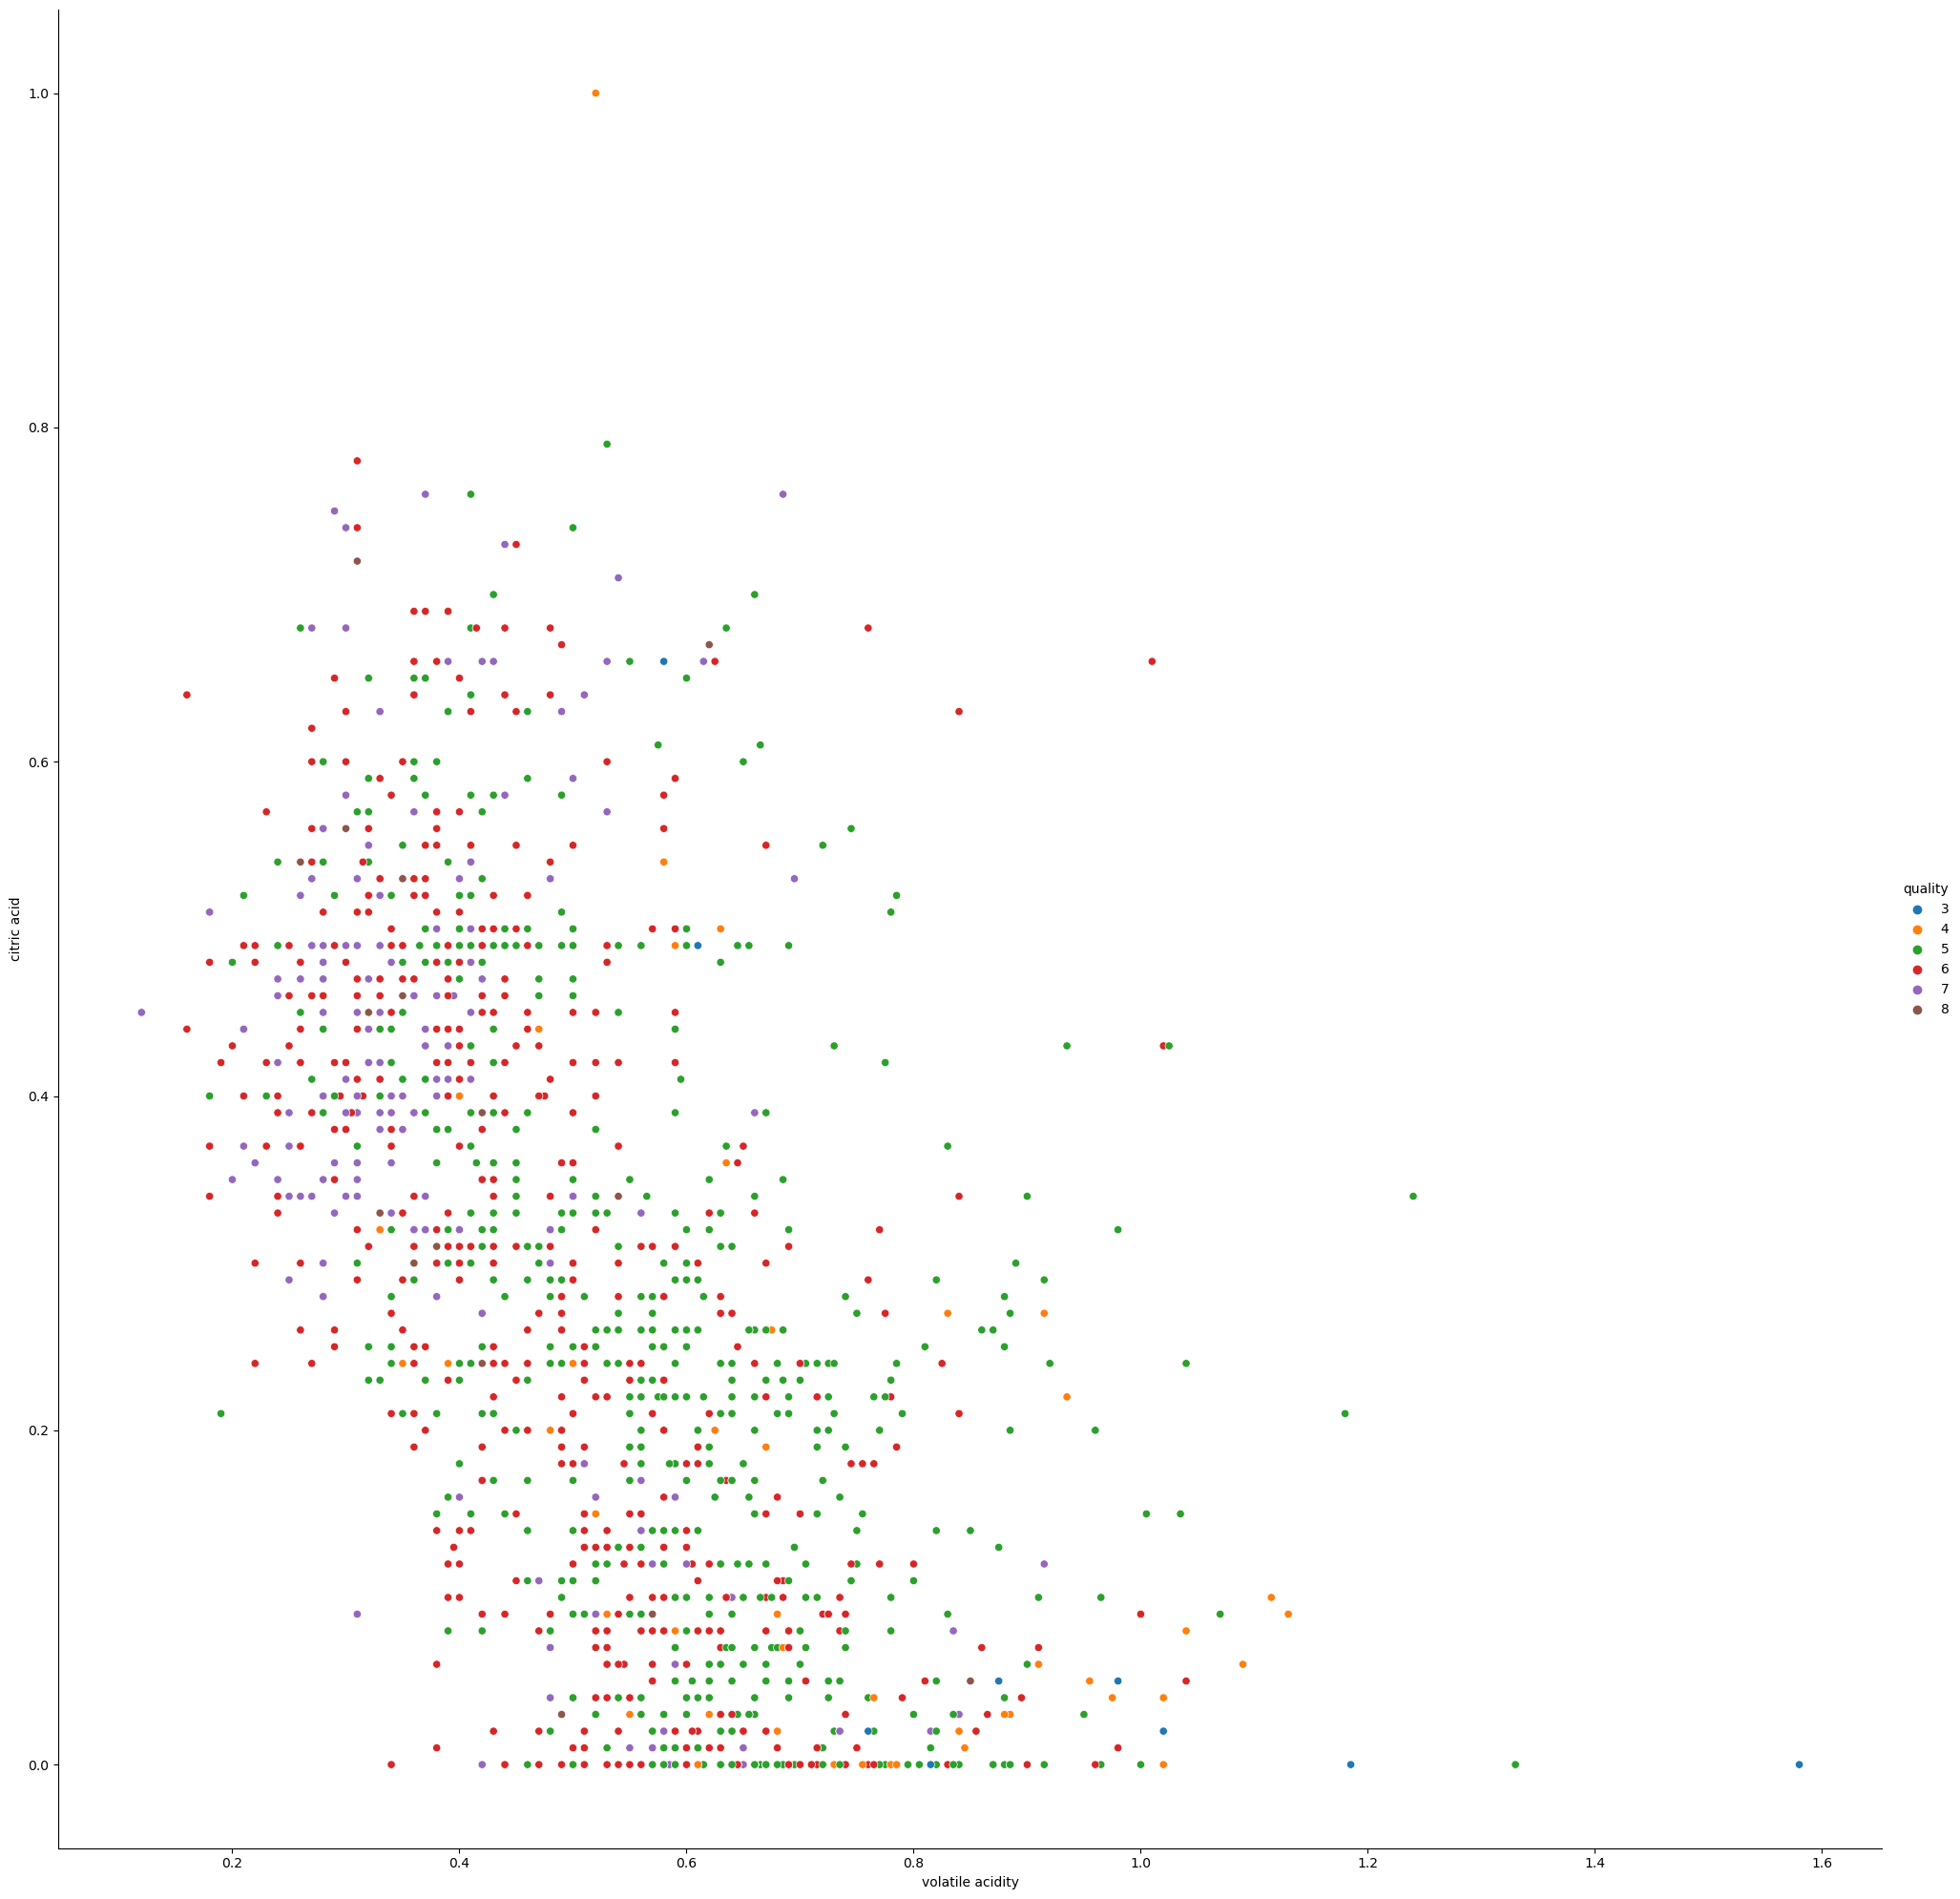

In [30]:
sns.relplot(x='volatile acidity', y="citric acid", hue="quality", data=data, height=20, palette=sns.color_palette())
plt.show()

#### According to citric acid 

C:\Users\Martin\AppData\Local\Temp\ipykernel_20940\795881885.py:1: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.relplot(x='citric acid', y="pH", hue="quality", data=data, height=15, palette=sns.color_palette())


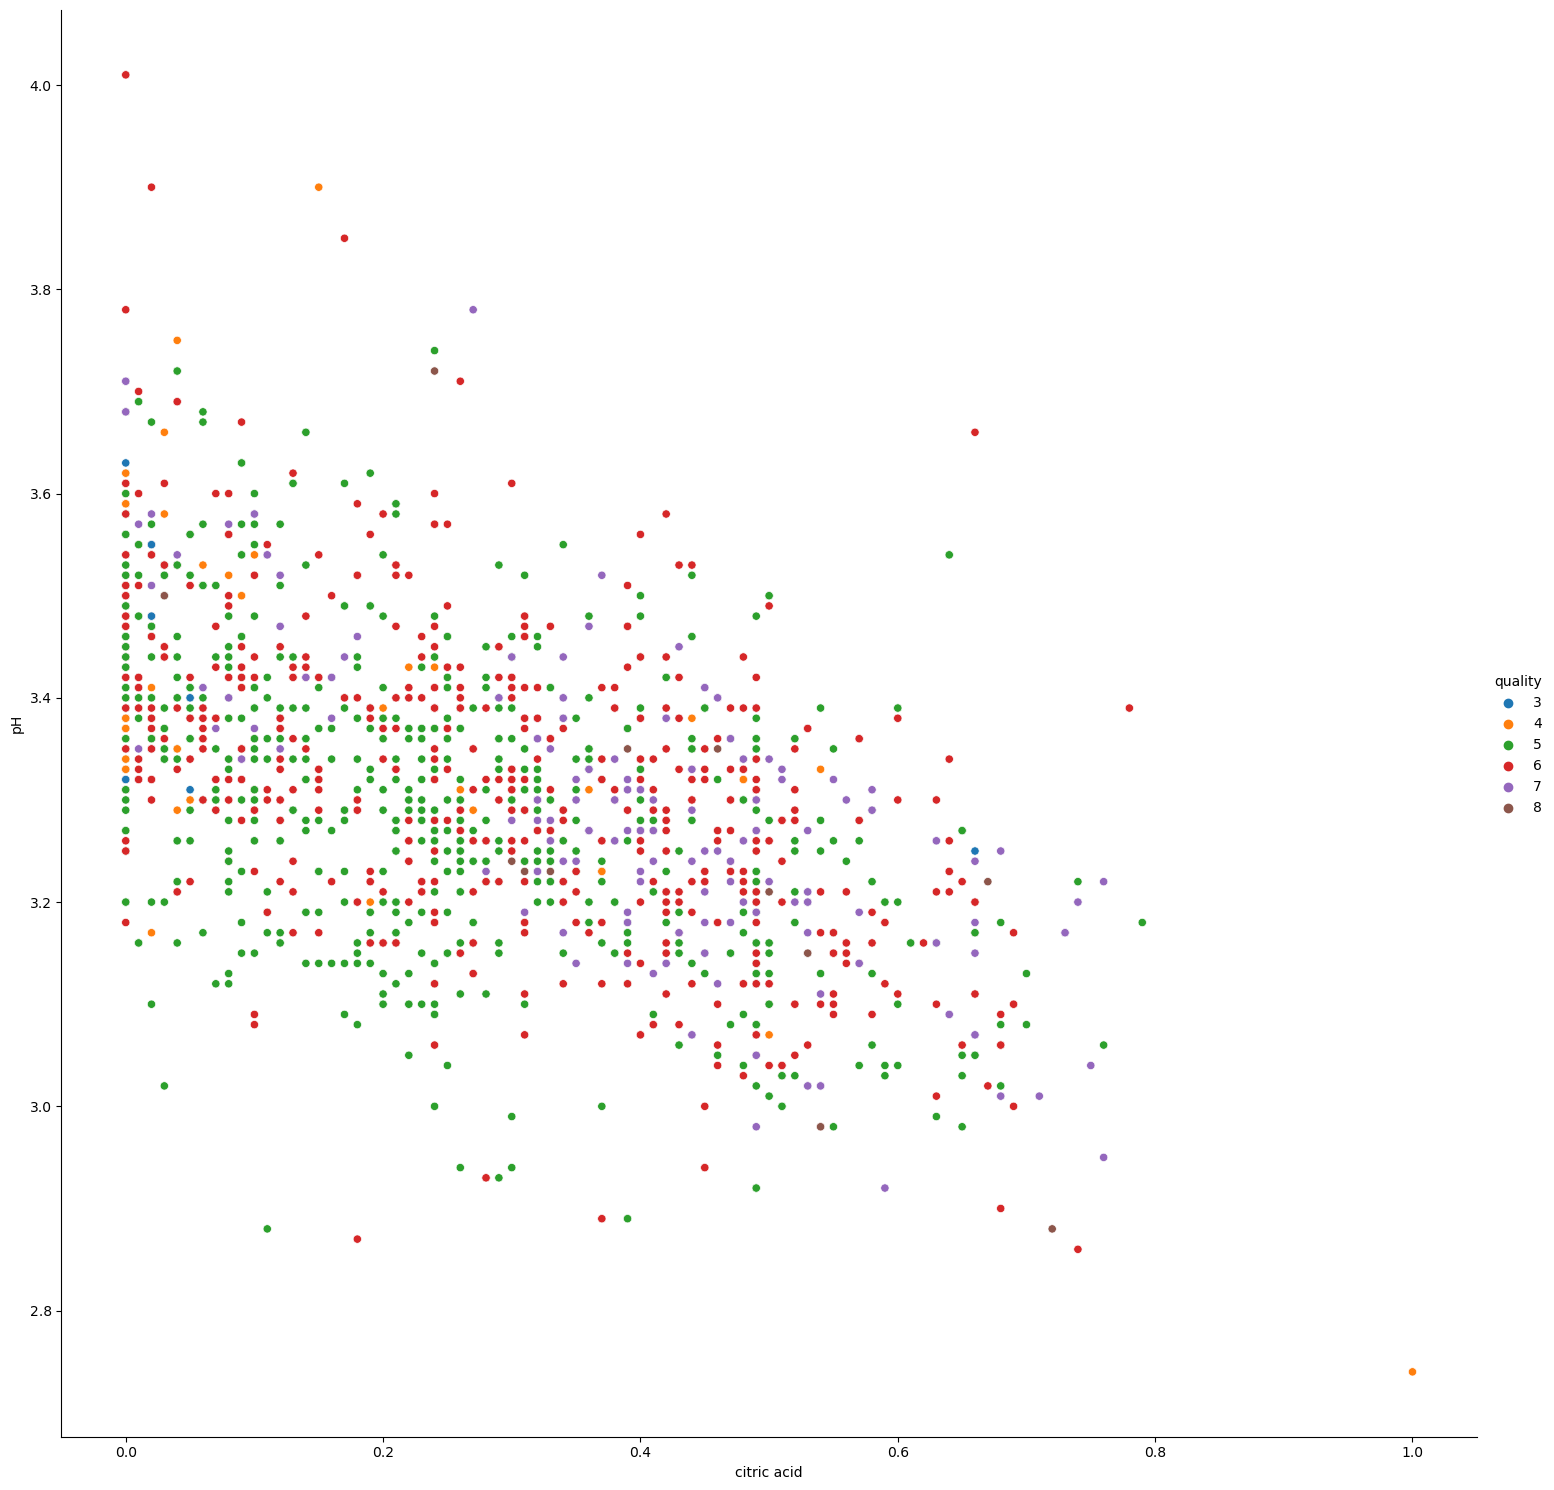

In [32]:
sns.relplot(x='citric acid', y="pH", hue="quality", data=data, height=15, palette=sns.color_palette())
plt.show()

#### According to free sulfur dioxide

C:\Users\Martin\AppData\Local\Temp\ipykernel_20940\1352558543.py:1: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.relplot(x='free sulfur dioxide', y="total sulfur dioxide", hue="quality", data=data, height=15, palette=sns.color_palette())


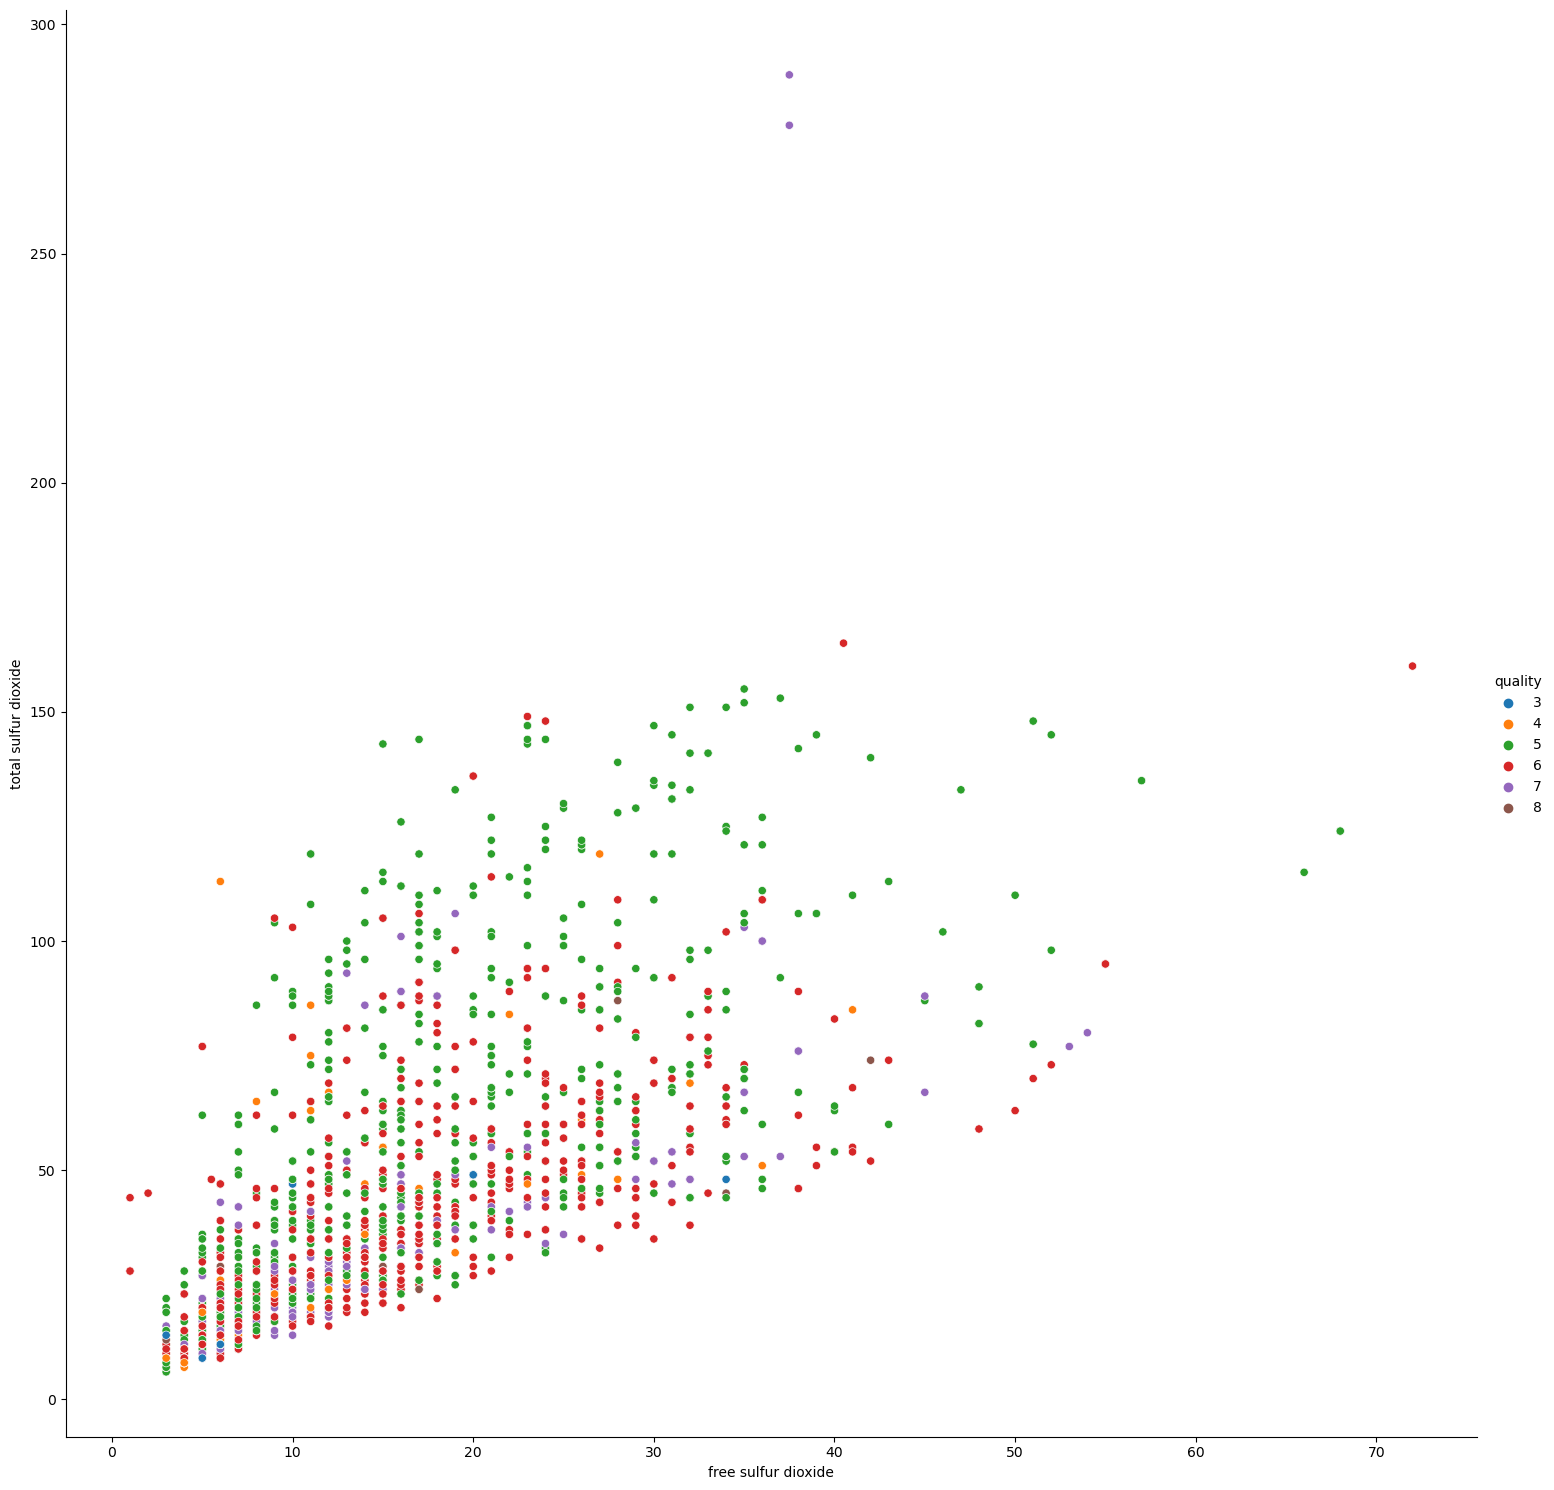

In [37]:
sns.relplot(x='free sulfur dioxide', y="total sulfur dioxide", hue="quality", data=data, height=15, palette=sns.color_palette())
plt.show()